### Your name:

<pre> Zahir Mohammed Mandsaurwala</pre>

### Collaborators:

<pre> None</pre>


In [1]:
# Common imports
import numpy as np
import pandas as pd

# Hide warnings
import warnings
warnings.filterwarnings("ignore")
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, accuracy_score

from scipy.stats import randint, uniform


### Classification - Based on Week 3

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In week 3, you:
- Explored the dataset
- Built a full data pipeline
- Pre-processed data, explored features

Building on your work of week 3:
- Split dataset into 3 sets:
  - 70% -> Training and cross validation
  - 15% -> Model Stacking
  - 15% -> Testing
  

- Tune a decision tree classfier:
  - select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice 
  - tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None    
  - tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.
  

In [2]:
credit_card_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(credit_card_dataset_url, header=1)

print("DATA SHAPE:", df.shape)
df.head(10)

DATA SHAPE: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
# Get the count of number of NULL values in the dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
# Dropping the ID column
df = df.drop(columns=["ID"])

# Split into features (X) and target (y)
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

X.head(10)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,100000,2,2,2,23,0,-1,-1,0,0,...,601,221,-159,567,380,601,0,581,1687,1542
8,140000,2,3,1,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,0,13007,13912,0,0,0,13007,1122,0


In [5]:
y.value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

- Split dataset into 3 sets:
  - 70% -> Training and cross validation
  - 15% -> Model Stacking
  - 15% -> Testing

- Splitting the data into training and testing sets using Stratified sampling according to "default payment next month" so that there is NO sampling bias.

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_stack, X_test, y_stack, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

- Tune a decision tree classfier:
  - select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice
    ##### Choosing score as "F1 score" because the the data is not-balanced as seen in target attribute ("default payment next month"). 23,364 instances have 0 value and only 6636 instances have value as 1
  - tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None    

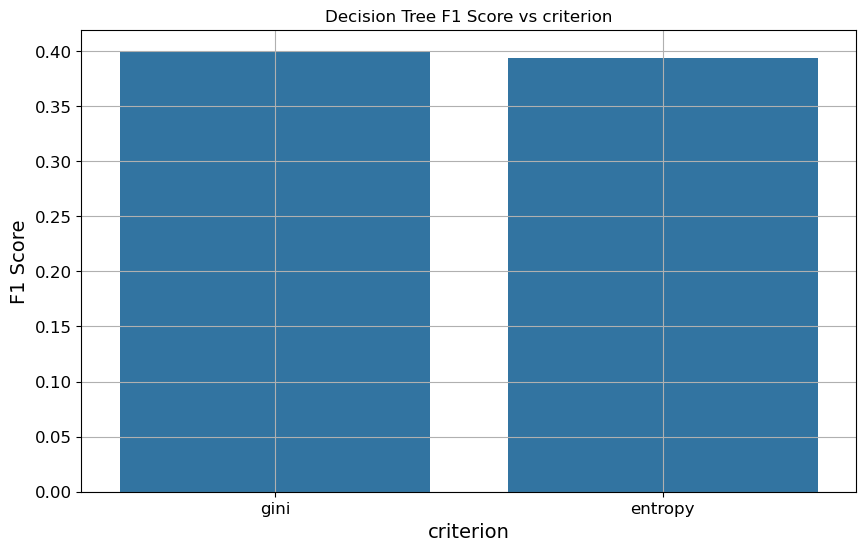

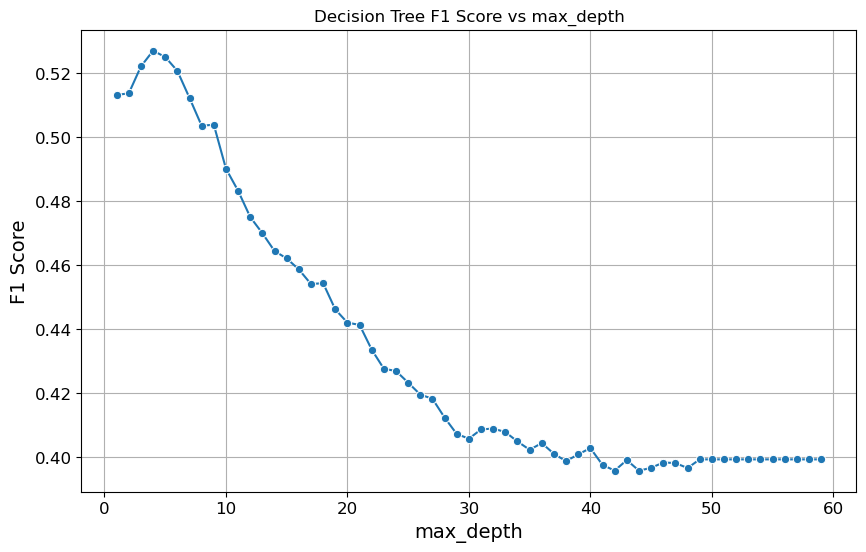

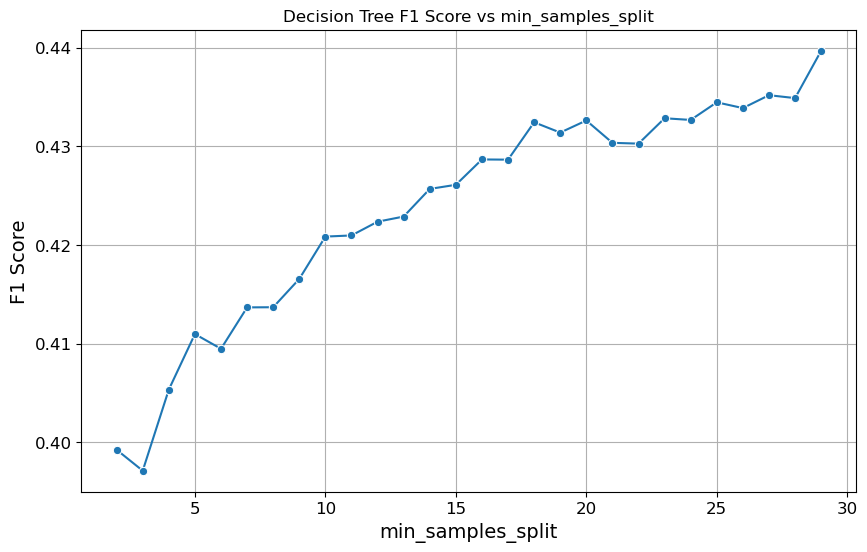

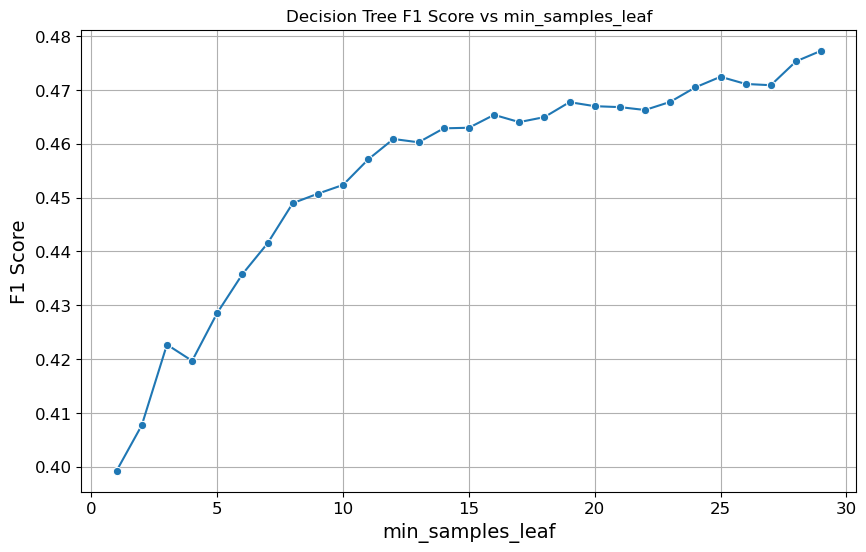

In [7]:
def tune_decision_tree_classifier(param_name, param_values):
    f1_scores = []
    for value in param_values:
        params = {param_name: value}
        clf = DecisionTreeClassifier(**{param_name: value}, max_leaf_nodes=None, class_weight='balanced', random_state=42)
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
        f1_scores.append((value, np.mean(scores)))
    
    results = pd.DataFrame(f1_scores, columns=[param_name, "F1 Score"])
    return results

def plot_decision_tree_tuning_results(results, param_name):
    plt.figure(figsize=(10, 6))
    if results[param_name].dtype == 'object':
        sns.barplot(data=results, x=param_name, y="F1 Score")
    else:
        sns.lineplot(data=results, x=param_name, y="F1 Score", marker="o")
    plt.title(f"Decision Tree F1 Score vs {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("F1 Score")
    plt.grid()
    plt.show()

criterion = ["gini", "entropy"]
results = tune_decision_tree_classifier('criterion', criterion)
plot_decision_tree_tuning_results(results, 'criterion')

max_depths = range(1, 60)
results = tune_decision_tree_classifier('max_depth', max_depths)
plot_decision_tree_tuning_results(results, 'max_depth')

min_samples_split = np.arange(2, 30)
results = tune_decision_tree_classifier('min_samples_split', min_samples_split)
plot_decision_tree_tuning_results(results, 'min_samples_split')

min_samples_leaf = range(1, 30)
results = tune_decision_tree_classifier('min_samples_leaf', min_samples_leaf)
plot_decision_tree_tuning_results(results, 'min_samples_leaf')


 - tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.

In [8]:
params_grid_coarse = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 20, 30],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [5, 10, 15]
}

random_coarse_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, max_leaf_nodes=None, class_weight='balanced'), params_grid_coarse, n_iter=10, cv=5, scoring='f1', random_state=42)
random_coarse_search.fit(X_train, y_train)

print("Best Coarse Parameters:", random_coarse_search.best_params_)
print("Best Coarse F1:", random_coarse_search.best_score_)
print("Best Coarse Estimator:", random_coarse_search.best_estimator_)

Best Coarse Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini'}
Best Coarse F1: 0.5254096722616822
Best Coarse Estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)


- Using the parameters from the previous grid to find the best parameters

In [9]:
params_grid = {
    "criterion": ["gini"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9]
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, max_leaf_nodes=None, class_weight='balanced'), params_grid, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best F1:", random_search.best_score_)
print("Best Estimator:", random_search.best_estimator_)

Best Parameters: {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 4, 'criterion': 'gini'}
Best F1: 0.5269862712737696
Best Estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       min_samples_split=3, random_state=42)


### Ensemble Learning

Make sure to read and understand the documentation for each classifier.

Remember to make your code modular; it will save you rewriting the same things multiple times and will help avoid copy paste errors.


  
- Tune the following classifiers:
  - Random forest classfier
  - Adaboost Tree classifier
  - Extra trees classifier
  - Gradient Boosted Tree classifier
  - Logistic Regression
  
- Analyze, compare, and interpret your results
- What ensemble yields the best result? Can you identify certain types of events that are classified better/worse from the type of algorithm?

    ##### By looking at the F1 score, Random Forest and Extra Trees yields the best results with Random Forest having slightly higher score.

    ##### Identifying Events Classified Better/Worse by Algorithms
        1.) Random Forest have a balanced False positive and False negatives which means it handles both errors well. Also, it has highest correctly  classified instances.
        2.) Extra Trees have the lowest False negatives but its False positives are a little higher than Random Forests which means it may classify non-defaulters as defaulters
        3.) Logistic Regression has the lowest F1 score as well as lowest correctly classified examples which means its the worse algorithm for this task.
  
- Is the feature importance consistent for all classifiers?
    ##### 1.) Feature importance are not consistent for all the classifiers.
    ##### 2.) Random Forest, Extra Trees, Gradient Boosting and Logistic Regression priortize PAY_0, PAY_2, and other `PAY_*` features
    ##### 3.) While AdaBoost focusses on Payment Amounts and Billing Amounts along with PAY_0.

In [10]:
def get_model_params():
    rf_params = {
        'n_estimators': randint(50, 300),
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced']
    }
    
    ada_params = {
        'n_estimators': randint(50, 300),
        'learning_rate': uniform(0.01, 1.0),
        'algorithm': ['SAMME', 'SAMME.R']
    }
    
    et_params = {
        'n_estimators': randint(50, 300),
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced']
    }
    
    gb_params = {
        'n_estimators': randint(50, 300),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'subsample': uniform(0.6, 0.4)
    }
    
    lr_params = [
        {
            'penalty': ['l2', None],  
            'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],  
            'C': uniform(0.01, 10),
            'max_iter': [300, 500, 1000],
            'class_weight': ['balanced']
        },
        {
            'penalty': ['l1'],  
            'solver': ['liblinear', 'saga'],  
            'C': uniform(0.01, 10),
            'max_iter': [300, 500, 1000],
            'class_weight': ['balanced']
        }
    ]
    
    classifier_models = {
        'Random Forest': (RandomForestClassifier(random_state=42), rf_params),
        'AdaBoost': (AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=42), ada_params),
        'Extra Trees': (ExtraTreesClassifier(random_state=42), et_params),
        'Gradient Boosting': (GradientBoostingClassifier(random_state=42), gb_params),
        'Logistic Regression': (LogisticRegression(random_state=42), lr_params)
    }
    
    return classifier_models

def tune_model(classifier_model, params, X_train, y_train, X_stack, y_stack, name):
    best_models = {}
    classifier_model_search = RandomizedSearchCV(estimator=classifier_model, param_distributions=params, n_iter=50, cv=5, scoring='f1',random_state=42, 
                                                    n_jobs=-1
                                                )
    
    classifier_model_search.fit(X_train, y_train)
    y_pred = classifier_model_search.predict(X_stack)
    
    print(f"\n{name} Best parameters: {classifier_model_search.best_params_}")
    print(f"{name} Best F1 score: {classifier_model_search.best_score_:.4f}")
        
    best_model = classifier_model_search.best_estimator_
    best_models[name] = best_model

    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
    else:
        importances = best_model.coef_[0]
    
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(f"{name} Importance Features: {importance_df[:5]}")

    misclassified = X_stack[y_stack != y_pred]
    false_positives = X_stack[(y_stack == 0) & (y_pred == 1)]
    false_negatives = X_stack[(y_stack == 1) & (y_pred == 0)]

    correct_classified = X_stack[y_stack == y_pred]
    
    print(f"{name} Misclassified Examples: {len(misclassified)}")
    print(f"{name} False Positives: {len(false_positives)} | False Negatives: {len(false_negatives)}")
    print(f"{name} Correctly classified Examples: {len(correct_classified)}")

    return best_models

classifier_models = get_model_params()
    
for name, (model, params) in classifier_models.items():
    best_models = tune_model(model, params, X_train, y_train, X_stack, y_stack, name)


Random Forest Best parameters: {'class_weight': 'balanced', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 77}
Random Forest Best F1 score: 0.5468
Random Forest Importance Features:       Feature  Importance
5       PAY_0    0.164823
6       PAY_2    0.073925
0   LIMIT_BAL    0.057500
11  BILL_AMT1    0.054054
17   PAY_AMT1    0.047660
Random Forest Misclassified Examples: 929
Random Forest False Positives: 477 | False Negatives: 452
Random Forest Correctly classified Examples: 3571

AdaBoost Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.2117192023353962, 'n_estimators': 145}
AdaBoost Best F1 score: 0.4809
AdaBoost Importance Features:       Feature  Importance
5       PAY_0    0.253274
18   PAY_AMT2    0.124272
17   PAY_AMT1    0.091643
0   LIMIT_BAL    0.078832
19   PAY_AMT3    0.062562
AdaBoost Misclassified Examples: 815
AdaBoost False Positives: 175 | False Negatives: 640
AdaBoost Correctly classified Examples:


- Stack your models. 
  - Combine the models from the previous section using the stacking approach: 
    - Choose the model use to combine. Examples are:
      - Linear Regression
      - Logistic Regression

In [11]:
stacking_features = pd.DataFrame()

for name, model in best_models.items():
    stacking_features[name] = cross_val_predict(model, X_train, y_train, cv=5, method='predict')

stacking_model = StackingClassifier(estimators=[(name, model) for name, model in best_models.items()], 
    final_estimator=LogisticRegression(class_weight='balanced', random_state=42), cv=5, n_jobs=-1)

stacking_model.fit(stacking_features, y_train)

test_features = pd.DataFrame()

for name, model in best_models.items():
    test_features[name] = model.predict(X_test)

y_test_pred = stacking_model.predict(test_features)
f1_test = f1_score(y_test, y_test_pred)
print(f"Stacked Model F1 Score on Test Set: {f1_test:.4f}")

Stacked Model F1 Score on Test Set: 0.4692


# Save the model

In [12]:
import joblib

joblib.dump(stacking_model, "W6_Mandsaurwala_X585677_model.pkl")

['W6_Mandsaurwala_X585677_model.pkl']

#### Conclusions?

Explain your results and choices

##### 1.) As the dataset is un-balanced I used F1 score so that it provides balance of precision and recall.
##### 2.) In the base models, I used class_weight ='balanced' because of point#1
##### 3.) In the evaluation of the models, False negative and False positive was also evaluated because False negative is really important in this dataset. An actual defaulter should be correctly classified as a defaulter and should not be missed. As well as the model should not incorrectly classify many non-defaulters as defaulters.                       
##### 4.) The F1 score of the Stacked model is less than the best model (Random Forest). This might be due to usage of Logistic Regression which by itself is not a powerful model as seen above.

Q. (Optional) If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

##### If a Decision Tree is overfitting the training set, then its a good idea to decrease the max_depth because it will contraint the model.

Q. (Optional) If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

##### If a Decision Tree is underfitting the training set, then there is NO point in scaling the input features because scaling doesn't affect Decision trees

Q. (Optional) What is the difference between hard and soft voting classifiers?

##### In a hard voting classifier the final result is the majority voting of all the classification models. In soft voting classifier, it takes the weighted average of all the probabilities of the all the classifiers where higher probability gets more weightage.

Q. (Optional) If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?

##### If your AdaBoost ensemble underfits the training data, then we can increase the number of estimators or reduce regularization on the base model.

Q. (Optional) If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

##### If your Gradient Boosting ensemble overfits the training set, then we should decrease the learning rate.

### Conclusions


### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W6_LastName.ipynb    
Example W6_Jackson.ipynb
